<a href="https://colab.research.google.com/github/gurralamanoj/GCD_Project/blob/main/GCD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true"
width="260" height="110" /></p>

---

# **Table of Contents**


1. [**Project Description**](#Section1)<br>
   1.1 [**Client's Requirement**](#Section11)<br>
   1.2 [**Problem Statement**](#Section12)<br>
   1.3 [**Role as a Data Scientist**](#Section13)<br>
   1.4 [**Task of Data Scientist**](#Section14)<br>


2. [**Installing & Importing Libraries**](#Section2)<br>


3. [**Data Acquisition & Description**](#Section3)<br>
   3.1 [**Importing "department_data**](#Section31)<br>
   3.2 [**Importing "employee_details_data**](#Section32)<br>
   3.3 [**Importing "employee_data**](#Section33)<br>
   3.4 [**Data Description**](#Section34)<br>
   
   

---
<a name = Section1></a>
## **1. Project Description**

<a id = Section11></a>
### 1.1 Client's Requirement

### The client for this project is the HR Department at a software company.

- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.

#### Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

#### This suffers from the following problems:
- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired us as data science consultants. They want to supplement their exit interviews with a more proactive approach.

---

<a id = Section12></a>
### 1.2 Problem Statement:

**Predict whether an employee will stay or leave.**


<a id = Section13></a>
### 1.3 Role as a Data Scientist
- The given datasets consist of past employees and their status (still employed or already left).
- Our task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, we don’t have quantifiable win condition. We need to build the best possible model.

<a id = Section14></a>
### 1.4 Task of Data Scientist
  - Machine learning task: **Classification**
  - Target variable: **Status (Employed/Left)**
  - Win condition: **N/A (best possible model)**

---
<a id = Section2></a>
## 2. Installing & Importing Libraries

In [1]:
 !pip install mysql-connector
 !pip install pandas

     |████████████████████████████████| 11.9 MB 10.8 MB/s 
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=17f13b25e3582ae6d692c80bf0e138a95acd23bc3229b81db7cefddedba3876d
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql-connector


In [2]:
import os
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_info_rows=20
pd.options.display.max_info_columns=20
pd.options.display.float_format = '{:.5f}'.format

---
<a name = Section3></a>
## **3. Data Acquisition & Description**

<a id = Section31></a>
### 3.1 Importing   "department_data"

In [4]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  passwd="student",
  database="Capstone2"
)

mycursor = mydb.cursor()

In [5]:
mycursor.execute("select * from department_data")
myresult = mycursor.fetchall()
df_department_data = pd.DataFrame(myresult)

field_names = [i[0] for i in mycursor.description]
df_department_data.columns = field_names

df_department_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


<a id = Section32></a>
### 3.2 Importing   "employee_details_data"

In [6]:
mycursor.execute("select * from employee_details_data")
myresult = mycursor.fetchall()
df_employee_details_data = pd.DataFrame(myresult)

field_names = [i[0] for i in mycursor.description]
df_employee_details_data.columns = field_names

df_employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


<a id = Section33></a>
### 3.3 Importing   "employee_data"

In [7]:
mycursor.execute("select * from employee_data")
myresult = mycursor.fetchall()
df_employee_data = pd.DataFrame(myresult)

field_names = [i[0] for i in mycursor.description]
df_employee_data.columns = field_names

df_employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.86684,6,nan,medium,0.13442,Left,4.00,124467
1,134.00,None,None,0.55572,2,nan,low,0.51104,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47408,2,nan,medium,0.40510,Left,3.00,126150
3,256.00,D00-SP,None,0.96136,6,nan,low,0.15297,Left,4.00,125346
4,146.00,D00-SS,None,0.50735,2,nan,medium,0.43484,Left,3.00,113707


<a id = Section34></a>
### 3.4 Data Description

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

1. **department_data**
    
    This dataset contains information about each department. The schema of the dataset is as follows:

    - dept_id – Unique Department Code
    - dept_name – Name of the Department
    - dept_head – Name of the Head of the Department
    

2. **employee_details_data**

    This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

    - employee_id – Unique ID Number for each employee
    - age – Age of the employee
    - gender – Gender of the employee
    - marital_status – Marital Status of the employee


3. **employee_data**

    This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.
    

**Target variable**

- **status** – Current employment status (Employed / Left)
    
    
**Administrative information**

- **department** – Department to which the employees belong(ed) to
- **salary** – Salary level with respect to rest of their department
- **tenure** – Number of years at the company
- **recently_promoted** – Was the employee promoted in the last 3 years?
- **employee_id** – Unique ID Number for each employee
    
    
**Workload information**

- **n_projects** – Number of projects employee has worked on
- **avg_monthly_hrs** – Average number of hours worked per month
    
    
**Mutual evaluation information**

- **satisfaction** – Score for employee’s satisfaction with the company (higher is better)
- **last_evaluation** – Score for most recent evaluation of employee (higher is better)
- **filed_complaint** – Has the employee filed a formal complaint in the last 3 years?

<a id = Section4></a>
### 4. Understanding Project Datasets

<a id = Section41></a>
### 4.1 Understand Dataset: department_data

In [8]:
df_department_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [9]:
df_department_data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [10]:
df_department_data.isnull().sum().sum()

0

In [11]:
df_department_data.isnull().sum().sort_values(ascending=False)

dept_head    0
dept_name    0
dept_id      0
dtype: int64

#### 'department_data' consists of 3 Columns and 11 Rows with no missing data

In [51]:
df_department_data.describe(include='all')

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-TP,Sales,Evelyn Tolson
freq,1,1,1


In [13]:
df_department_data['dept_id'].value_counts()

D00-TP     1
D00-PR     1
D00-AD     1
D00-MT     1
D00-SS     1
D00-SP     1
D00-PD     1
D00-ENG    1
D00-IT     1
D00-FN     1
D00-MN     1
Name: dept_id, dtype: int64

In [14]:
df_department_data['dept_name'].value_counts()

Sales          1
Procurement    1
IT             1
Finance        1
Support        1
Management     1
Engineering    1
Product        1
Admin          1
Marketing      1
Temp           1
Name: dept_name, dtype: int64

In [15]:
df_department_data['dept_head'].value_counts()

Evelyn Tolson            1
Aanchal J                1
Amelia Westray           1
Ellie Trafton            1
Louie Viles              1
Edward J Bayley          1
Henry Adey               1
Darcy Staines            1
Reuben Swann             1
Sushant Raghunathan K    1
Micheal Zachrey          1
Name: dept_head, dtype: int64

In [47]:
df_department_data

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


#### In the 'department_data', there are 11 UNIQUE 'Department ID' having all different UNIQUE 'Department Name' headed by 11 different 'Department Heads'

<a id = Section42></a>
### 4.2 Understand Dataset: employee_details_data

In [16]:
df_employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [17]:
df_employee_details_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   employee_id     int64 
 1   age             int64 
 2   gender          object
 3   marital_status  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [18]:
df_employee_details_data.isnull().sum().sum()

0

In [19]:
df_employee_details_data.isnull().sum().sort_values(ascending=False)

marital_status    0
gender            0
age               0
employee_id       0
dtype: int64

#### 'employee_details_data' consists of 4 Columns and 14,245 Rows with no missing data

In [50]:
df_employee_details_data.describe(include='all')

,employee_id,age,gender,marital_status
count,14245.00000,14245.00000,14245,14245
unique,nan,nan,2,2
top,nan,nan,Male,Unmarried
freq,nan,nan,9382,7283
mean,112123.05054,32.88993,NaN,NaN
std,8500.45734,9.97083,NaN,NaN
min,100101.00000,22.00000,NaN,NaN
25%,105775.00000,24.00000,NaN,NaN
50%,111298.00000,29.00000,NaN,NaN
75%,116658.00000,41.00000,NaN,NaN


In [21]:
df_employee_details_data.describe(include='all')

,employee_id,age,gender,marital_status
count,14245.00000,14245.00000,14245,14245
unique,nan,nan,2,2
top,nan,nan,Male,Unmarried
freq,nan,nan,9382,7283
mean,112123.05054,32.88993,NaN,NaN
std,8500.45734,9.97083,NaN,NaN
min,100101.00000,22.00000,NaN,NaN
25%,105775.00000,24.00000,NaN,NaN
50%,111298.00000,29.00000,NaN,NaN
75%,116658.00000,41.00000,NaN,NaN


In [22]:
df_employee_details_data['gender'].value_counts()

Male      9382
Female    4863
Name: gender, dtype: int64

In [23]:
df_employee_details_data['gender'].value_counts(1)*100

Male     65.86171
Female   34.13829
Name: gender, dtype: float64

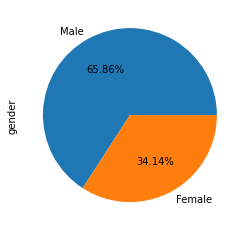

In [24]:
df_employee_details_data['gender'].value_counts().plot(kind='pie', autopct='%.2f%%')

#### From gender column, we have seen that 9,382 employees are males which accounts for 65.86% of the sample while 4,863 employees are females which accounts for 34.14% of the sample.

---

In [25]:
df_employee_details_data['marital_status'].value_counts()

Unmarried    7283
Married      6962
Name: marital_status, dtype: int64

In [26]:
df_employee_details_data['marital_status'].value_counts(1)*100

Unmarried   51.12671
Married     48.87329
Name: marital_status, dtype: float64

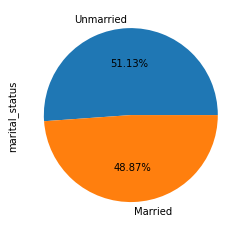

In [27]:
df_employee_details_data['marital_status'].value_counts().plot(kind='pie', autopct='%.2f%%')

#### From marital status column, we have seen that 7,283 employees are Unmarried which accounts for 51.13% of the sample while 6,962 employees are Married which accounts for 48.87% of the sample.

---

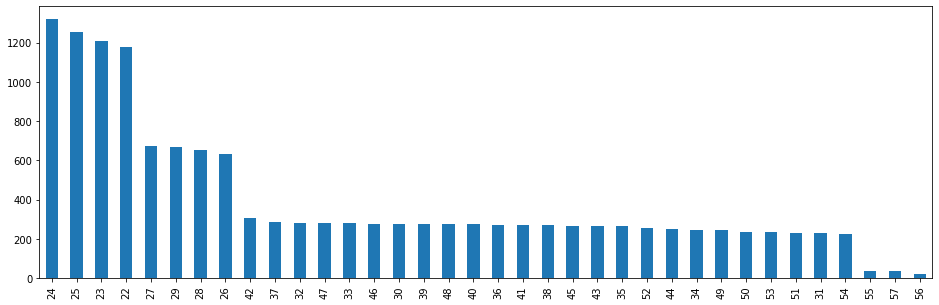

In [28]:
df_employee_details_data['age'].value_counts().plot(kind='bar', figsize=(16,5))

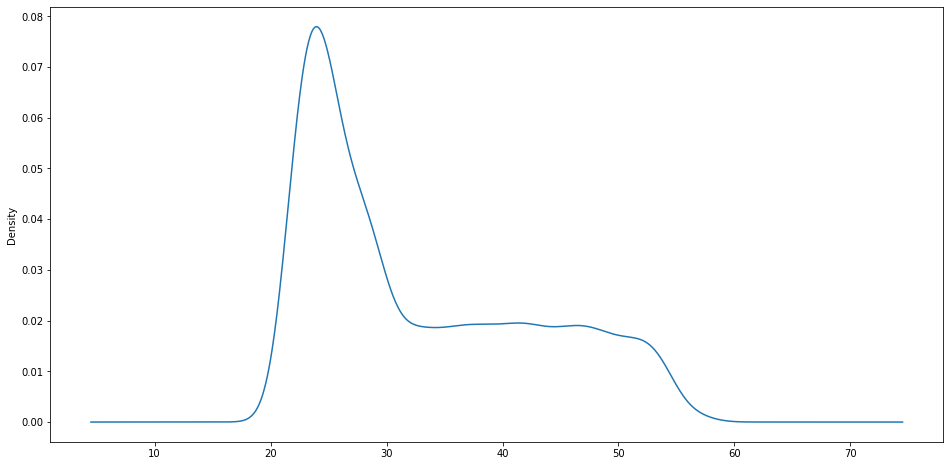

In [29]:
df_employee_details_data['age'].plot(kind='kde', figsize=(16,8))

#### Age of the employee ranges from 22 Years to 57 Years and most of the employee are from age group 22-29 years. From describe function also we have seen that 50% of the employees are from 22 Years to 29 Years.

<a id = Section43></a>
### 4.3 Understand Dataset: employee_data

In [30]:
df_employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.86684,6,nan,medium,0.13442,Left,4.00,124467
1,134.00,None,None,0.55572,2,nan,low,0.51104,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47408,2,nan,medium,0.40510,Left,3.00,126150
3,256.00,D00-SP,None,0.96136,6,nan,low,0.15297,Left,4.00,125346
4,146.00,D00-SS,None,0.50735,2,nan,medium,0.43484,Left,3.00,113707


In [31]:
df_employee_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   avg_monthly_hrs    object 
 1   department         object 
 2   filed_complaint    object 
 3   last_evaluation    float64
 4   n_projects         int64  
 5   recently_promoted  float64
 6   salary             object 
 7   satisfaction       float64
 8   status             object 
 9   tenure             object 
 10  employee_id        int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


In [32]:
df_employee_data.isnull().sum().sort_values(ascending=False)

recently_promoted    13853
filed_complaint      12104
last_evaluation       1487
department             707
tenure                 150
satisfaction           150
employee_id              0
status                   0
salary                   0
n_projects               0
avg_monthly_hrs          0
dtype: int64

- **employee_detail_data (14,245) has 95 more entry compared to employee_data (14,150)**
- **department has 707 missing data, which is a major concern as 'department' is primary column for merging data**
- **Department column heading is different**
- **How to fill missing data??**

In [33]:
df_employee_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

- **department column has 707 missing data as well as it has 12 unique value. But it has one '-IT' entry (having 207 entry) apart from 'D00-IT', which I feel it would be part of 'D00-IT'.**

In [34]:
df_employee_data.replace(to_replace='-IT', value='D00-IT', inplace=True)

In [35]:
df_employee_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

- **In 'department_data', Column Name of Department ID is 'dept_id' whereas same Column Name of Department ID in 'employee_data' is department. So, in order to merge data from both dataset, we need same column name. Thus, we are changing column name in employee_data to dept_id from department.**

In [36]:
df_employee_data = df_employee_data.rename({'department':'dept_id'}, axis=1)
df_employee_data.head()

,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.86684,6,nan,medium,0.13442,Left,4.00,124467
1,134.00,None,None,0.55572,2,nan,low,0.51104,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47408,2,nan,medium,0.40510,Left,3.00,126150
3,256.00,D00-SP,None,0.96136,6,nan,low,0.15297,Left,4.00,125346
4,146.00,D00-SS,None,0.50735,2,nan,medium,0.43484,Left,3.00,113707


<a id = Section5></a>
### 5. Merging of Datasets

- **Merging of department_data and employee_data**

In [37]:
df_merged1 = pd.merge(left=df_department_data, right=df_employee_data, on='dept_id', how='outer')
df_merged1.head()

,dept_id,dept_name,dept_head,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,D00-IT,IT,Henry Adey,244.00,None,0.92620,6,nan,medium,0.06187,Left,5.00,112868
1,D00-IT,IT,Henry Adey,289.00,None,0.92986,7,nan,low,0.16174,Left,4.00,122314
2,D00-IT,IT,Henry Adey,235.00,None,0.95764,5,nan,low,0.72571,Left,5.00,126561
3,D00-IT,IT,Henry Adey,158.00,None,0.54633,2,nan,low,0.39149,Left,3.00,115017
4,D00-IT,IT,Henry Adey,277.00,None,0.94960,2,nan,medium,0.72321,Left,3.00,112281


In [38]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   dept_id            object 
 1   dept_name          object 
 2   dept_head          object 
 3   avg_monthly_hrs    object 
 4   filed_complaint    object 
 5   last_evaluation    float64
 6   n_projects         int64  
 7   recently_promoted  float64
 8   salary             object 
 9   satisfaction       float64
 10  status             object 
 11  tenure             object 
 12  employee_id        int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.5+ MB


- **Now merging 'employee_details_data' with the first merged dataset**

In [39]:
df_final = pd.merge(left=df_employee_details_data, right=df_merged1, on='employee_id', how='right')
df_final.head()

,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,112868,29.00000,Female,Married,D00-IT,IT,Henry Adey,244.00,None,0.92620,6,nan,medium,0.06187,Left,5.00
1,122314,36.00000,Female,Married,D00-IT,IT,Henry Adey,289.00,None,0.92986,7,nan,low,0.16174,Left,4.00
2,126561,22.00000,Female,Unmarried,D00-IT,IT,Henry Adey,235.00,None,0.95764,5,nan,low,0.72571,Left,5.00
3,115017,24.00000,Female,Unmarried,D00-IT,IT,Henry Adey,158.00,None,0.54633,2,nan,low,0.39149,Left,3.00
4,112281,28.00000,Male,Unmarried,D00-IT,IT,Henry Adey,277.00,None,0.94960,2,nan,medium,0.72321,Left,3.00


In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   employee_id        int64  
 1   age                float64
 2   gender             object 
 3   marital_status     object 
 4   dept_id            object 
 5   dept_name          object 
 6   dept_head          object 
 7   avg_monthly_hrs    object 
 8   filed_complaint    object 
 9   last_evaluation    float64
 10  n_projects         int64  
 11  recently_promoted  float64
 12  salary             object 
 13  satisfaction       float64
 14  status             object 
 15  tenure             object 
dtypes: float64(4), int64(2), object(10)
memory usage: 1.8+ MB


<a id = Section6></a>
### 6. Feature Engineering: Treating missing data

In [41]:
df_final.isnull().sum().sort_values(ascending=False)

recently_promoted    13853
filed_complaint      12104
last_evaluation       1487
dept_head              707
dept_name              707
dept_id                707
tenure                 150
satisfaction           150
marital_status           5
gender                   5
age                      5
status                   0
salary                   0
n_projects               0
avg_monthly_hrs          0
employee_id              0
dtype: int64

In [42]:
missing_data = pd.DataFrame(df_final.isnull().sum(), columns=['Total Missing Values'])
missing_data['% of Missing Values'] = df_final.isnull().sum() / len(df_final) * 100
missing_data = missing_data.sort_values(by = '% of Missing Values', ascending=False)
missing_data

,Total Missing Values,% of Missing Values
recently_promoted,13853,97.90106
filed_complaint,12104,85.54064
last_evaluation,1487,10.50883
dept_id,707,4.99647
dept_name,707,4.99647
dept_head,707,4.99647
satisfaction,150,1.06007
tenure,150,1.06007
age,5,0.03534
gender,5,0.03534


- **recently_promoted** has 13,853 missing data (14,150-13853) ie., 297 got promotion recently and remaining weren't got promotion. So, I am replacing NULL value with '0'.


- **filed_complaint** has 12,104 missing value which means 12,104 employee has not filed any complaint. So, I am replacing NULL value with '0'.


- **last_evaluation** is 'Score for most recent evaluation of employee (higher is better)' has 1,487 missing value, which means either data is missing or 1,487 employee has not got any evaluation. Here, I am assuming that it has never evaluated and hence I am replacing NULL value with '0'. **Second Thought:** replacing with Median / Mean.


- **satisfaction** is 'Score for employee’s satisfaction with the company (higher is better)' has 150 missing value, which means either data is missing or 150 employee has not given its satisfaction score. Here, again I am assuming that it has not gave its satisfaction score and hence I am replacing NULL value with '0'. **Second Thought:** replacing with Median / Mean.


- **dept_id** has 707 missing value, I am replacing it with Mode.


- **dept_name** has 707 missing value, I am replacing it with Mode.


- **dept_head** has 707 missing value, I am replacing it with Mode.


- **tenure** has 150 missing value, I am replacing it with Median.


- **age** has 5 missing value, I am replacing it with Median.


- **gender** has 5 missing value, I am replacing it with Mode.


- **marital_status** has 5 missing value, I am replacing it with Mode.

### Replacing Missing Values:

- Replacing **null value** of **'recently_promoted'** and **'filed_complaint'** with **'0.0'**.

In [43]:
df_final['recently_promoted'].fillna('0.0', inplace=True)

In [44]:
df_final['filed_complaint'].fillna('0.00', inplace=True)

- Replacing **last_evaluation, satisfaction, dept_id, dept_name, dept_head, tenure, age, gender and marital_status** with **Mean / Median / Mode**

In [45]:
df_final['last_evaluation'].fillna(df_final['last_evaluation'].mean(), inplace=True)
df_final['satisfaction'].fillna(df_final['satisfaction'].mean(), inplace=True)
df_final['dept_id'].fillna(df_final['dept_id'].mode()[0], inplace=True)
df_final['dept_name'].fillna(df_final['dept_name'].mode()[0], inplace=True)
df_final['dept_head'].fillna(df_final['dept_head'].mode()[0], inplace=True)
df_final['tenure'].fillna(df_final['tenure'].median(), inplace=True)
df_final['age'].fillna(df_final['age'].median(), inplace=True)
df_final['gender'].fillna(df_final['gender'].mode()[0], inplace=True)
df_final['marital_status'].fillna(df_final['marital_status'].mode()[0], inplace=True)

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   employee_id        int64  
 1   age                float64
 2   gender             object 
 3   marital_status     object 
 4   dept_id            object 
 5   dept_name          object 
 6   dept_head          object 
 7   avg_monthly_hrs    object 
 8   filed_complaint    object 
 9   last_evaluation    float64
 10  n_projects         int64  
 11  recently_promoted  object 
 12  salary             object 
 13  satisfaction       float64
 14  status             object 
 15  tenure             object 
dtypes: float64(3), int64(2), object(11)
memory usage: 1.8+ MB


<a id = Section7></a>
### 7. Data Analysis / Visualization of various Feature Columns 